In [1]:
import sys
sys.path.append('..')

import numpy as np
import electrode2currentmap as e2cm
import effectivecurrent2brightness as ec2b
from utils import TimeSeries
import matplotlib.pyplot as plt
%matplotlib inline

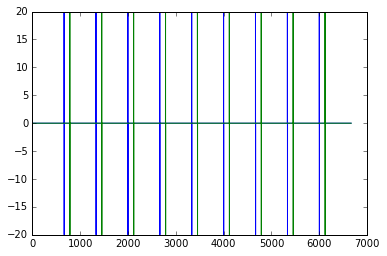

In [2]:
s1 = e2cm.Psycho2Pulsetrain(freq=20, dur=0.5, pulse_dur=.075/1000.,
                            interphase_dur=.075/1000., delay=0.,
                            tsample=.075/1000., current_amplitude=20,
                            pulsetype='cathodicfirst')

s2 = e2cm.Psycho2Pulsetrain(freq=20, dur=0.5, pulse_dur=.075/1000.,
                            interphase_dur=.075/1000., delay=9/1000,
                            tsample=.075/1000., current_amplitude=20,
                            pulsetype='cathodicfirst')


plt.plot(s1.data)
plt.plot(s2.data)

In [8]:
ea1 = e2cm.ElectrodeArray([250], [0], [0])
ea2 = e2cm.ElectrodeArray([100, 100], [-200, 200], [200, -200])

r = e2cm.Retina(axon_map='../axon.npz')
#ecm = r.ecm(ea2, [s1, s2])

ecs_list = r.electrode_ecs(ea1)
tm1 = ec2b.TemporalModel()

sr = np.zeros(r.gridx.shape + (11493, ))
fr = np.zeros(r.gridx.shape + (6778, ))
ca = np.zeros(r.gridx.shape + (11493, ))
sn = np.zeros(r.gridx.shape + (11493, ))

for xx in range(r.gridx.shape[0]):
    for yy in range(r.gridx.shape[1]):
        ecm = r.ecm(xx, yy, ecs_list, [s1])
        fr[xx, yy] = tm1.fast_response(ecm).data
        ca[xx, yy] = tm1.charge_accumulation(TimeSeries(ecm.tsample, fr[xx, yy]), ecm).data
        sn[xx, yy] = tm1.stationary_nonlinearity(TimeSeries(ecm.tsample, ca[xx, yy])).data
        sr[xx, yy] = tm1.slow_response(TimeSeries(ecm.tsample, sn[xx, yy])).data[:sr.shape[-1]]

sr = TimeSeries(ecm.tsample, sr)
sr.resample(25)

#for i in range(sr.data.shape[-1]):
#     fig, ax = plt.subplots(1)
#     ax.matshow(sr.data[:, :, i], cmap='viridis', vmax=sr.data.max(),
#                vmin=sr.data.min())
#     fig.savefig('/Users/arokem/tmp/figures-tmp/fig%03d' % i)
#     plt.close("all")

In [9]:
np.where(fr > 0)

(array([ 0,  0,  0, ..., 79, 79, 79]),
 array([ 0,  0,  0, ..., 79, 79, 79]),
 array([ 665,  666, 1332, ..., 5335, 6001, 6002]))

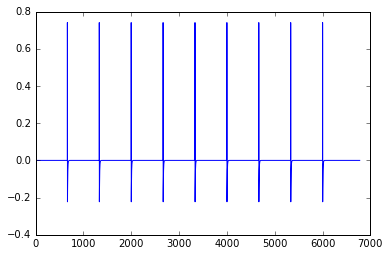

In [10]:
plt.plot(fr[40, 40])

In [ ]:
elec = ea1.electrodes[0]

In [ ]:
plt.matshow(elec.current_spread(r.gridx, r.gridy), cmap='viridis')

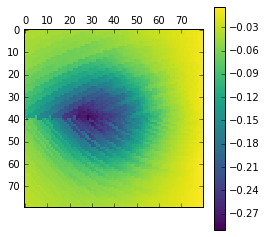

In [11]:
plt.matshow(fr[:, :, 667], cmap='viridis')
plt.colorbar()